In [1]:
def warn(*args, **kwargs):
    pass

import warnings
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel as C

warnings.warn = warn

In [73]:
class Customer:
    def __init__(self, name, clicks_a, clicks_b, clicks_c,prob):
        self.name = name
        self.clicks_a = clicks_a
        self.clicks_b = clicks_b
        self.clicks_c = clicks_c
        self.prob = prob
    
    def num_clicks(self, bid):
        return (1.0 - np.exp(self.clicks_a * bid + self.clicks_b * bid**2)) * self.clicks_c
    
    def cum_cost_clicks(self, bid):
        C=self.clicks_c/50
        return 1.5*C*np.log10(1+bid/C)
    
    def compute_pricing(self,prices):
        for i in range(0,5):
            ret=(prices[i]-8.0)*self.prob[i]
        return ret
    
    def num_clicks_noise(self,bid):
        noise_std=5.0
        return self.num_clicks(self.bid) +np.random.normal(0,noise_std, size=self.num_clicks(self.bid).shape)
    
    def cum_cost_clicks_noise(self,bid):
        noise_std=5.0
        return self.cum_cost_clicks(self.bid) +np.random.normal(0,noise_std, size=self.cum_cost_clicks(self.bid).shape)

In [10]:
def sell_margin(price):
    return 10

In [69]:
customers = []
customers.append(Customer('C1', -1.5, 0.5, 100, [0.95,0.82,0.53,0.28,0.14]))
customers.append(Customer('C2', -0.5, -1.5, 80,[0.8,0.78,0.63,0.48,0.3]))
customers.append(Customer('C3', -5, 0.3, 65,[0.7,0.6,0.41,0.22,0.1]))

bids = np.linspace(0.0,2.0,100)
prices = np.linspace(10.0,50.0,5,dtype=float)

margin = 20

<function matplotlib.pyplot.show(close=None, block=None)>

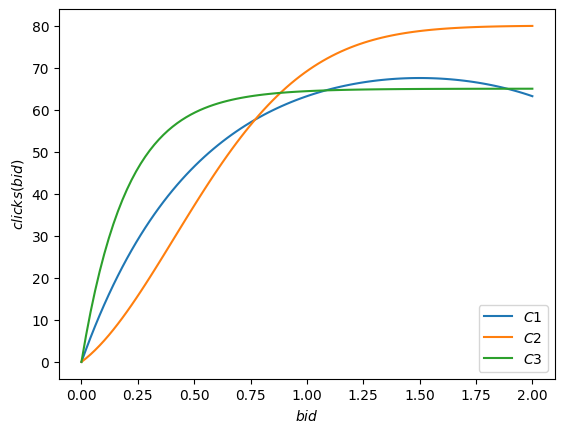

In [7]:
x = np.atleast_2d(bids).T
plt.figure(0)

for C in customers:
    plt.plot(x, C.num_clicks(x), label=r'$' + C.name + '$')

plt.xlabel('$bid$')
plt.ylabel('$clicks(bid)$')
plt.legend(loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

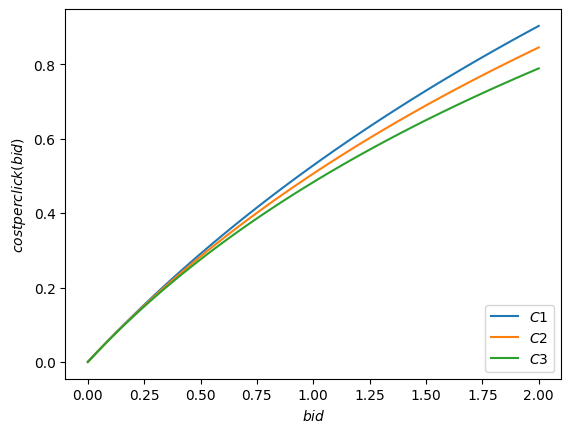

In [8]:
x = np.atleast_2d(bids).T
plt.figure(0)

for C in customers:
    plt.plot(x, C.cum_cost_clicks(x), label=r'$' + C.name + '$')

plt.xlabel('$bid$')
plt.ylabel('$cost per click(bid)$')
plt.legend(loc='lower right')
plt.show

In [76]:
reward = 0
best_prices = []
best_bids = []
rewards = []


for C in customers:
    best_price = prices[ np.argmax( C.compute_pricing(prices) ) ]
    best_pricing_reward=np.max(C.compute_pricing(prices))
    best_prices.append(best_price)
    
    best_bid = bids[ np.argmax( [C.num_clicks(bid) * best_pricing_reward  - C.cum_cost_clicks(bid) for bid in bids] ) ]
    best_bids.append(best_bid)
    
    reward = C.num_clicks(best_bid) * best_pricing_reward  - C.cum_cost_clicks(best_bid)
    rewards.append(reward)
    
    print('CUSTOMER {}'.format(C.name))
    print('   Best price: {}'.format(best_price))
    print('   Best bid: {}'.format(best_bid))
    
    print('Total reward: {}'.format(sum(rewards)))

CUSTOMER C1
   Best price: 30.0
   Best bid: 1.494949494949495
Total reward: 786.7231624191679
CUSTOMER C2
   Best price: 40.0
   Best bid: 2.0
Total reward: 2013.5574038164273
CUSTOMER C3
   Best price: 30.0
   Best bid: 2.0
Total reward: 2598.9801163687353


In [16]:
reward = 0
best_prices = []
best_bids = []
rewards = []

for C in customers:
    best_price = prices[ np.argmax( [0.2 * 30 for price in prices] ) ]
    best_prices.append(best_price)
    
    best_bid = bids[ np.argmax( [C.num_clicks(bid) * 0.2 * 30 - C.cum_cost_clicks(bid) for bid in bids] ) ]
    best_bids.append(best_bid)
    
    reward = C.num_clicks(best_bid) * 0.2 * 30 - C.cum_cost_clicks(best_bid)
    rewards.append(reward)
    
    print('CUSTOMER {}'.format(C.name))
    print('   Best price: {}'.format(best_price))
    print('   Best bid: {}'.format(best_bid))
    
print('Total reward: {}'.format(sum(rewards)))

CUSTOMER C1
   Best price: 10.0
   Best bid: 1.494949494949495
CUSTOMER C2
   Best price: 10.0
   Best bid: 2.0
CUSTOMER C3
   Best price: 10.0
   Best bid: 1.9595959595959598
Total reward: 1272.3488063718773
